In [2]:
#Project Initialization and Data Loading:
#This block imports essential libraries (like pandas and matplotlib) and 
#loads the BMW sales data (2010-2024) (1).csv into the DataFrame df to begin the sales analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('C:Downloads\\BMW sales data (2010-2024).csv')

In [3]:
#Initial Data Audit and Structure Check: This block displays the first few rows

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low


In [5]:
#changes data columns into lowercase and replace spaces with "_" 
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')
df.head(2)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low


In [7]:
#checks data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 50000 non-null  object 
 1   year                  50000 non-null  int64  
 2   region                50000 non-null  object 
 3   color                 50000 non-null  object 
 4   fuel_type             50000 non-null  object 
 5   transmission          50000 non-null  object 
 6   engine_size_l         50000 non-null  float64
 7   mileage_km            50000 non-null  int64  
 8   price_usd             50000 non-null  int64  
 9   sales_volume          50000 non-null  int64  
 10  sales_classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [8]:
#dropping duplicate rows
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 50000 non-null  object 
 1   year                  50000 non-null  int64  
 2   region                50000 non-null  object 
 3   color                 50000 non-null  object 
 4   fuel_type             50000 non-null  object 
 5   transmission          50000 non-null  object 
 6   engine_size_l         50000 non-null  float64
 7   mileage_km            50000 non-null  int64  
 8   price_usd             50000 non-null  int64  
 9   sales_volume          50000 non-null  int64  
 10  sales_classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [10]:
#summarizes descriptive statistics for columns like Price_USD and Mileage_KM to identify immediate cleaning or formatting needs.
df.head(2)
df.describe()

,year,engine_size_l,mileage_km,price_usd,sales_volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [11]:
df.head(1)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High


In [12]:
#calculating car age in new column "car_age" Creation: This specific block help understanding cars age for analysis.
df['car_age']=2024-df['year']
df.head(5)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification,car_age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4


In [13]:
#calculating price_in_rupees in new column 
df['price_in_rupees']=df['price_usd']*87
df.head(2)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification,car_age,price_in_rupees
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8,8590380
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11,6892053


In [14]:
#modifying engine size column in required format and adding new column
df['engine_cc']=(df['engine_size_l']*1000).astype(int)
df.head(2)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification,car_age,price_in_rupees,engine_cc
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8,8590380,3500
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11,6892053,1600


In [15]:
#calculating revenue in new column
df['revenue']=(df['price_in_rupees']*df['sales_volume']).astype(int)
df.head(2)

,model,year,region,color,fuel_type,transmission,engine_size_l,mileage_km,price_usd,sales_volume,sales_classification,car_age,price_in_rupees,engine_cc,revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8,8590380,3500,71300154000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11,6892053,1600,23625957684


In [16]:
#dropping unused columns

df.drop(columns=['price_usd','engine_size_l'],inplace=True)
df.head(2)

,model,year,region,color,fuel_type,transmission,mileage_km,sales_volume,sales_classification,car_age,price_in_rupees,engine_cc,revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,151748,8300,High,8,8590380,3500,71300154000
1,i8,2013,North America,Red,Hybrid,Automatic,121671,3428,Low,11,6892053,1600,23625957684


In [17]:
#Creating Mileage_Group (Binning for categorical analysis) it helps converting a range of mileage in specific group

bins=[0,50000,100000,df['mileage_km'].max()+1]
labels=['low(0-50K KM)','Medium (50K-100K)','High(>100K KM)']
df['mileage_group']=pd.cut(df['mileage_km'],bins=bins,labels=labels,right=False)
df.head(5)

,model,year,region,color,fuel_type,transmission,mileage_km,sales_volume,sales_classification,car_age,price_in_rupees,engine_cc,revenue,mileage_group
0,5 Series,2016,Asia,Red,Petrol,Manual,151748,8300,High,8,8590380,3500,71300154000,High(>100K KM)
1,i8,2013,North America,Red,Hybrid,Automatic,121671,3428,Low,11,6892053,1600,23625957684,High(>100K KM)
2,5 Series,2022,North America,Blue,Petrol,Automatic,10991,6994,Low,2,9854055,4500,68919260670,low(0-50K KM)
3,X3,2024,Middle East,Blue,Petrol,Automatic,27255,4047,Low,0,5304477,1700,21467218419,low(0-50K KM)
4,7 Series,2020,South America,Black,Diesel,Manual,122131,3080,Low,4,4341126,2100,13370668080,High(>100K KM)


In [26]:
#Exploratory Data Analysis (EDA) on Sales Volume: 
#This block calculates the distribution of Sales_Volume across years to understand the range of sales performance..

yearly_performance=df.groupby('year').agg(
    Total_sales_volume=('sales_volume','sum'),
    average_price=('price_in_rupees','mean')).astype(int).reset_index()
print(yearly_performance)

    year  Total_sales_volume  average_price
0   2010            16933445        6531282
1   2011            16758941        6550515
2   2012            16751895        6526702
3   2013            16866733        6484624
4   2014            16958960        6486418
5   2015            17010207        6442311
6   2016            16957550        6572288
7   2017            16620811        6540063
8   2018            16412273        6564626
9   2019            17191956        6541915
10  2020            16310843        6530017
11  2021            16884666        6559737
12  2022            17920946        6522205
13  2023            16268654        6541878
14  2024            17527854        6527249


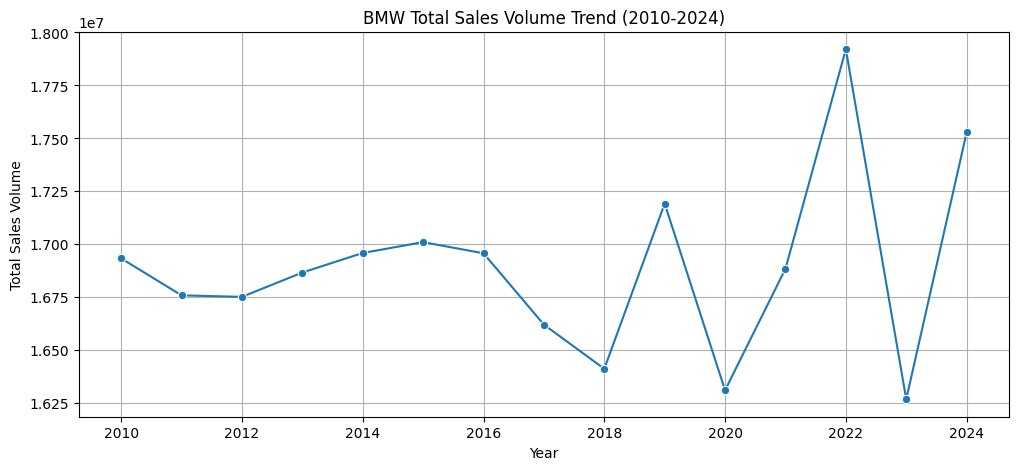

In [27]:
#This block visulise the distribution of Sales_Volume across years to understand the range of sales performance..

yearly_performance=df.groupby('year').agg(
    Total_sales_volume=('sales_volume','sum'),
    average_price=('price_in_rupees','mean')).astype(int).reset_index()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Sales Volume Trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='year', y='Total_sales_volume', data=yearly_performance, marker='o')
plt.title('BMW Total Sales Volume Trend (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.savefig('sales_volume_trend.png')
plt.show() # Important to close figure after saving

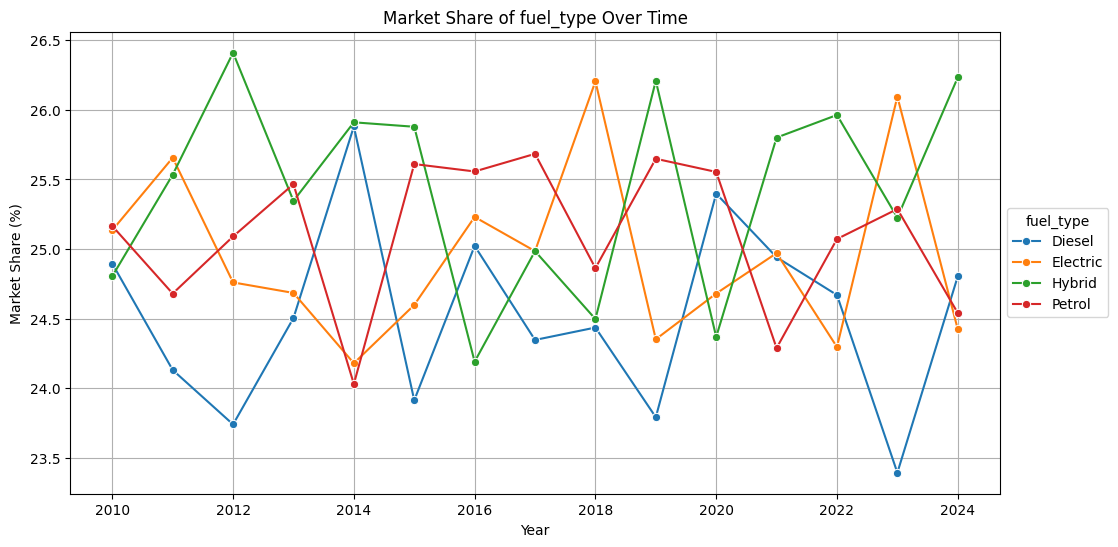

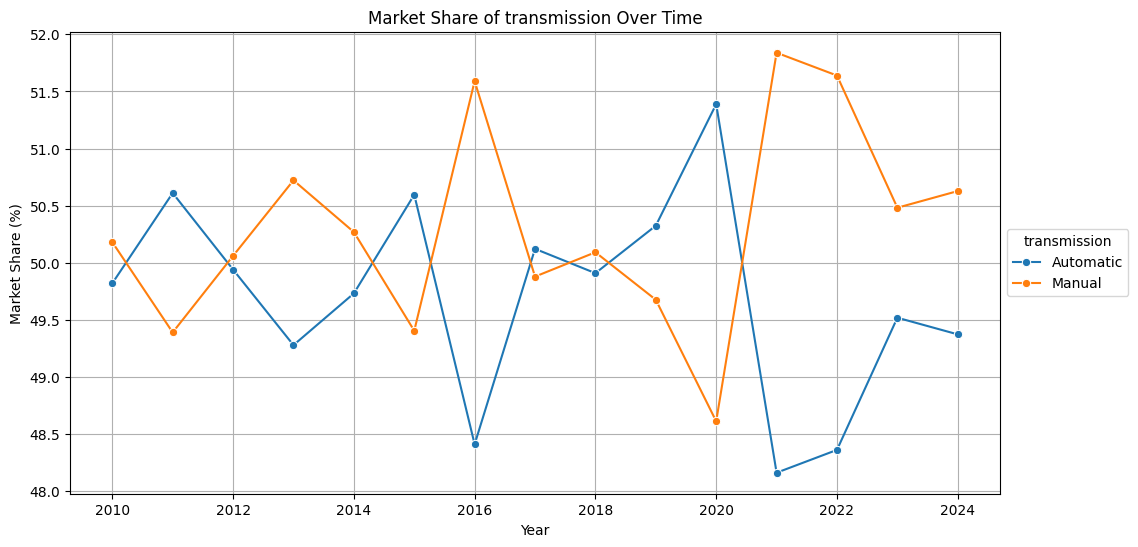

In [20]:
#This block filters the main DataFrame to create a new subset containing only vehicles 
#where Fuel_Type is 'Electric' or 'Hybrid' and Sales_Volume is classified as 'High'. 
#This enables a focused analysis on BMW's most successful and profitable electric vehicle segments to study future demand trends."

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_market_share(feature, filename):
    df_count = df.groupby(['year', feature]).size().reset_index(name='Count')
    df_count['Total_Year_Count'] = df_count.groupby('year')['Count'].transform('sum')
    df_count['Market_Share'] = (df_count['Count'] / df_count['Total_Year_Count']) * 100

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_count, x='year', y='Market_Share', hue=feature, marker='o')
    plt.title(f'Market Share of {feature} Over Time')
    plt.xlabel('Year')
    plt.ylabel('Market Share (%)')
    plt.legend(title=feature, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
plot_market_share('fuel_type', 'fuel_type_market_share.png')
plot_market_share('transmission', 'transmission_market_share.png')

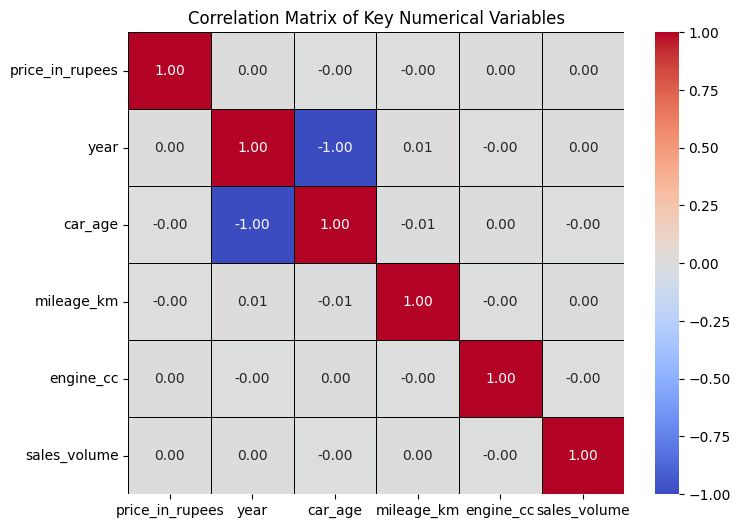

In [21]:
#Price Determinants (Correlation Matrix)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

corr_cols = ['price_in_rupees', 'year', 'car_age', 'mileage_km', 'engine_cc', 'sales_volume']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Key Numerical Variables')
plt.savefig('correlation_matrix.png')
plt.show()


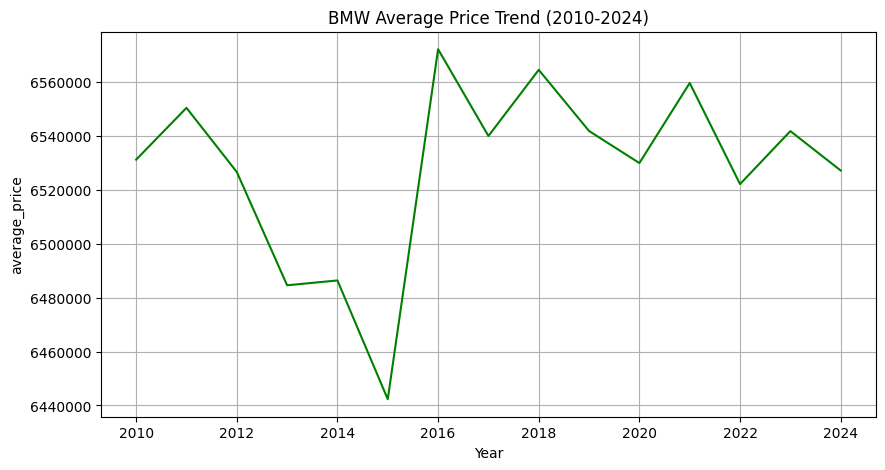

In [22]:
#Plotting graph of Average Price Trend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='year',y='average_price',data=yearly_performance,color='green')
plt.title('BMW Average Price Trend (2010-2024)')
plt.xlabel('Year')
plt.ylabel('average_price')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('BMW_avg_price_trend.png')
plt.show()

In [28]:
#this blocks of code sorts and gives ranks to each model by the region,and sort it by sales volume

regional_sales = df.groupby(['region', 'model'])['sales_volume'].sum().reset_index()
regional_sales['rank'] = regional_sales.groupby('region')['sales_volume'].rank(method='first', ascending=False)
top_3_regional_models = regional_sales[regional_sales['rank']<= 3].sort_values(
    ['region', 'rank']
)
print(regional_sales.to_string())


           region     model  sales_volume  rank
0          Africa  3 Series       3892595   5.0
1          Africa  5 Series       4020702   1.0
2          Africa  7 Series       3699471   7.0
3          Africa        M3       3448709  11.0
4          Africa        M5       3676252   8.0
5          Africa        X1       3928136   4.0
6          Africa        X3       3742723   6.0
7          Africa        X5       3972541   2.0
8          Africa        X6       3630167   9.0
9          Africa        i3       3967283   3.0
10         Africa        i8       3586673  10.0
11           Asia  3 Series       3962239   4.0
12           Asia  5 Series       3935629   5.0
13           Asia  7 Series       4004066   2.0
14           Asia        M3       3935579   6.0
15           Asia        M5       3928390   7.0
16           Asia        X1       4192289   1.0
17           Asia        X3       3796115   8.0
18           Asia        X5       3748736  10.0
19           Asia        X6       375607

In [24]:
#this block of code load the new data into SQL where i extract my data

from sqlalchemy import create_engine
username="root"
password="2950"
host="localhost"
port="3306"
database="ajju"
engine=create_engine(f"mysql+pymysql://{"root"}:{2950}@{"localhost"}:{3306}/{"ajju"}")
conn=engine.connect()

In [25]:
df.to_sql("BMW_sales_data",con=conn,if_exists="append",index=False)

C:\Users\Ajjud\AppData\Local\Temp\ipykernel_19756\2074214636.py:1: UserWarning: The provided table name 'BMW_sales_data' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql("BMW_sales_data",con=conn,if_exists="append",index=False)


50000